### Libraries Needed

In [434]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

### Let us do some web scraping

In [258]:
url = requests.get("http://hmfw.ap.gov.in/covid_dashboard.aspx")
html = url.content
df_list = pd.read_html(html)
tests_df = df_list[1]

In [259]:
tests_df

,0,1,2,3,4
0,Name of the District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths
1,Ananthapur,720,21,0,2
2,Chittoor,993,23,1,0
3,East Godavari,1243,17,3,0
4,Guntur,1375,122,0,4
5,Kadapa,1016,36,0,0
6,Krishna,691,45,4,4
7,Kurnool,933,110,0,2
8,Nellore,1401,58,1,2
9,Prakasam,744,42,1,0


### Formatting the data

In [261]:
tests_df.columns = tests_df.iloc[0]

tests_df.drop(index=0, inplace=True)

tests_df.reset_index(inplace=True, drop=True)

In [262]:
tests_df

,Name of the District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths
0,Ananthapur,720,21,0,2
1,Chittoor,993,23,1,0
2,East Godavari,1243,17,3,0
3,Guntur,1375,122,0,4
4,Kadapa,1016,36,0,0
5,Krishna,691,45,4,4
6,Kurnool,933,110,0,2
7,Nellore,1401,58,1,2
8,Prakasam,744,42,1,0
9,Srikakulam,630,0,0,0


In [111]:
df["Population"] = ""

### Obtaining the population of the cities in Andhra Pradesh

In [308]:
url = requests.get("http://www.populationu.com/in/andhra-pradesh-population")
html = url.content
df_list = pd.read_html(html)
df = df_list[4]

In [309]:
df

,District,Population(2020 est.),Population(2011),Percentage
0,Srikakulam,3081550,2703114,5516559.18
1,Vizianagaram,2672700,2344474,4784640.82
2,Visakhapatnam,4891271,4290589,8756304.08
3,East Godavari,5875897,5154296,10518971.43
4,West Godavari,4488141,3936966,8034624.49
5,Krishna,5149834,4517398,9219179.59
6,Guntur,5572107,4887813,9975128.57
7,Prakasam,3873091,3397448,6933567.35
8,Sri Potti Sriramulu Nellore,3378455,2963557,6048075.51
9,Y.S.R.,3286015,2882469,5882589.80


### Some cleaning on the tests_df datframe

In [314]:
df.replace(to_replace={"Anantapur":"Ananthapur", "Y.S.R.":"Kadapa", "Sri Potti Sriramulu Nellore":"Nellore"}, inplace=True)

population_df = df.groupby("District").sum()

population_df.reset_index(inplace=True)

tests_df.rename(columns={"Name of the District" : "District"}, inplace=True)

tests_df.head()

,District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths
0,Ananthapur,720,21,0,2
1,Chittoor,993,23,1,0
2,East Godavari,1243,17,3,0
3,Guntur,1375,122,0,4
4,Kadapa,1016,36,0,0


In [317]:
population_df.drop(axis=1, labels="index", inplace=True)

In [318]:
population_df.head()

,District,Population(2020 est.),Population(2011),Percentage
0,Ananthapur,4652509,4081148,8328873.47
1,Chittoor,4758433,4174064,8518497.96
2,East Godavari,5875897,5154296,10518971.43
3,Guntur,5572107,4887813,9975128.57
4,Kadapa,3286015,2882469,5882589.80


### Combing the tests and population dataframe

In [324]:
combined_df = pd.merge(tests_df, population_df, how="inner", on="District")

combined_df.drop(axis=1, labels=["Population(2011)", "Percentage"], inplace=True)

combined_df["Total Samples Tested"] = combined_df["Total Samples Tested"].astype(int)

combined_df

,District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths,Population(2020 est.)
0,Ananthapur,720,21,0,2,4652509
1,Chittoor,993,23,1,0,4758433
2,East Godavari,1243,17,3,0,5875897
3,Guntur,1375,122,0,4,5572107
4,Kadapa,1016,36,0,0,3286015
5,Krishna,691,45,4,4,5149834
6,Kurnool,933,110,0,2,4620948
7,Nellore,1401,58,1,2,3378455
8,Prakasam,744,42,1,0,3873091
9,Srikakulam,630,0,0,0,3081550


### Calculating the tests per million 

In [325]:
combined_df["Tests Per Million"] = (combined_df["Total Samples Tested"] / combined_df["Population(2020 est.)"]) * 1000000

In [352]:
combined_df.head()

,District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths,Population(2020 est.),Tests Per Million
0,Ananthapur,720,21,0,2,4652509,154.755208
1,Chittoor,993,23,1,0,4758433,208.682144
2,East Godavari,1243,17,3,0,5875897,211.542170
3,Guntur,1375,122,0,4,5572107,246.764823
4,Kadapa,1016,36,0,0,3286015,309.189094


In [356]:
combined_df.sort_values(by="Tests Per Million", inplace=True, ascending=False)
combined_df.head()

,District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths,Population(2020 est.),Tests Per Million
12,Nellore,1401,58,1,2,3378455,414.686595
11,Kadapa,1016,36,0,0,3286015,309.189094
10,Guntur,1375,122,0,4,5572107,246.764823
9,East Godavari,1243,17,3,0,5875897,211.542170
8,Chittoor,993,23,1,0,4758433,208.682144


In [357]:
combined_df.reset_index(drop=True, inplace=True)
combined_df.head()

,District,Total Samples Tested,Confirmed Cases,Cured/ Discharged,Deaths,Population(2020 est.),Tests Per Million
0,Nellore,1401,58,1,2,3378455,414.686595
1,Kadapa,1016,36,0,0,3286015,309.189094
2,Guntur,1375,122,0,4,5572107,246.764823
3,East Godavari,1243,17,3,0,5875897,211.542170
4,Chittoor,993,23,1,0,4758433,208.682144


Text(0, 0.5, 'Tests Per Million')

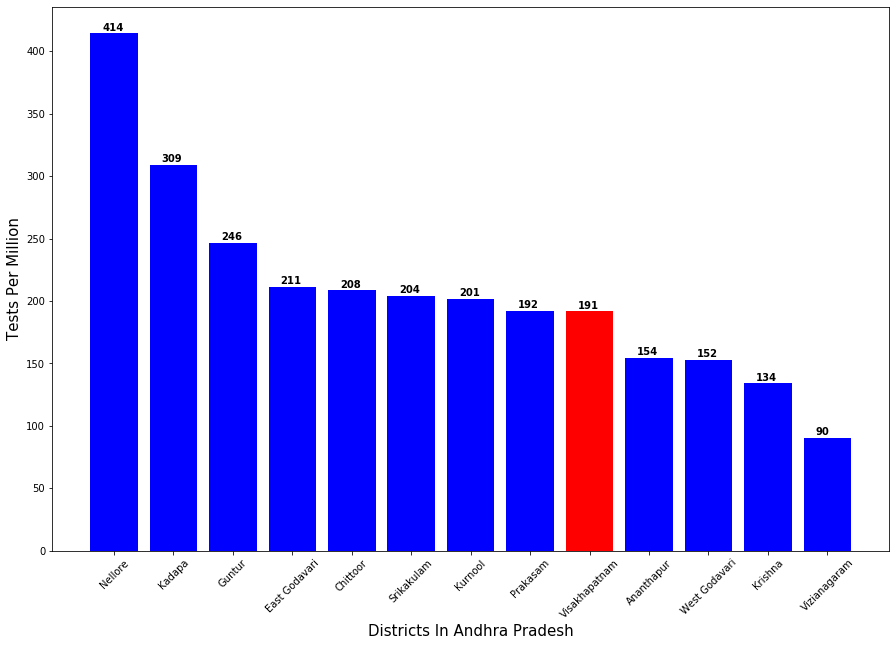

In [424]:
fig, ax = plt.subplots(figsize=(15,10))
x = combined_df["District"]
y = combined_df["Tests Per Million"]
plt.xticks(rotation=45, fontsize=10)
ax.bar(x, y, color=["blue","blue","blue","blue","blue","blue","blue","blue","red"])
for i in range(len(x)):
    ax.text(i-0.2,y[i]+2,int(y[i]), fontweight="bold")
plt.xlabel("Districts In Andhra Pradesh", fontsize=15)
plt.ylabel("Tests Per Million", fontsize=15)

### Getting the number of tests per million in different countries

In [461]:
url = requests.get("https://www.worldometers.info/coronavirus/")
html = url.content
df_list = pd.read_html(html)
df = df_list[0]
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,World,2182160,852.0,145520.0,50.0,547221.0,1489419,56588.0,280.0,18.7,NaN,NaN
1,USA,677570,NaN,34617.0,NaN,57508.0,585445,13369.0,2047.0,105.0,3398140.0,10266.0
2,Spain,184948,NaN,19315.0,NaN,74797.0,90836,7371.0,3956.0,413.0,930230.0,19896.0
3,Italy,168941,NaN,22170.0,NaN,40164.0,106607,2936.0,2794.0,367.0,1178403.0,19490.0
4,France,165027,NaN,17920.0,NaN,32812.0,114295,6248.0,2528.0,275.0,333807.0,5114.0


In [462]:
world_df = df[["Country,Other", "Tests/ 1M pop"]]
world_df.head()

,"Country,Other",Tests/ 1M pop
0,World,NaN
1,USA,10266.0
2,Spain,19896.0
3,Italy,19490.0
4,France,5114.0


In [463]:
world_df = world_df[~np.isnan(world_df["Tests/ 1M pop"])]
world_df.head()

,"Country,Other",Tests/ 1M pop
1,USA,10266.0
2,Spain,19896.0
3,Italy,19490.0
4,France,5114.0
5,Germany,20629.0


In [464]:
world_df.sort_values(by="Tests/ 1M pop", ascending=False, inplace=True)
world_df.reset_index(drop=True, inplace=True)
world_df.head()

,"Country,Other",Tests/ 1M pop
0,Faeroe Islands,117983.0
1,Iceland,111955.0
2,UAE,77550.0
3,Luxembourg,50577.0
4,Gibraltar,48945.0


In [531]:
vizag_stats = combined_df[combined_df["District"] == "Visakhapatnam"][["District", "Tests Per Million"]]

vizag_stats.rename(columns={"District" : "Country,Other", "Tests Per Million" : "Tests/ 1M pop"}, inplace=True)

vizag_stats.reset_index(drop=True, inplace=True)

In [533]:
world_df = world_df.append(vizag_stats)

In [540]:
world_df.sort_values(by="Tests/ 1M pop", ascending=False, inplace=True)
world_df.reset_index(drop=True, inplace=True)

In [554]:
filtered_world_df = world_df.iloc[130:150]

filtered_world_df.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Tests Per Million')

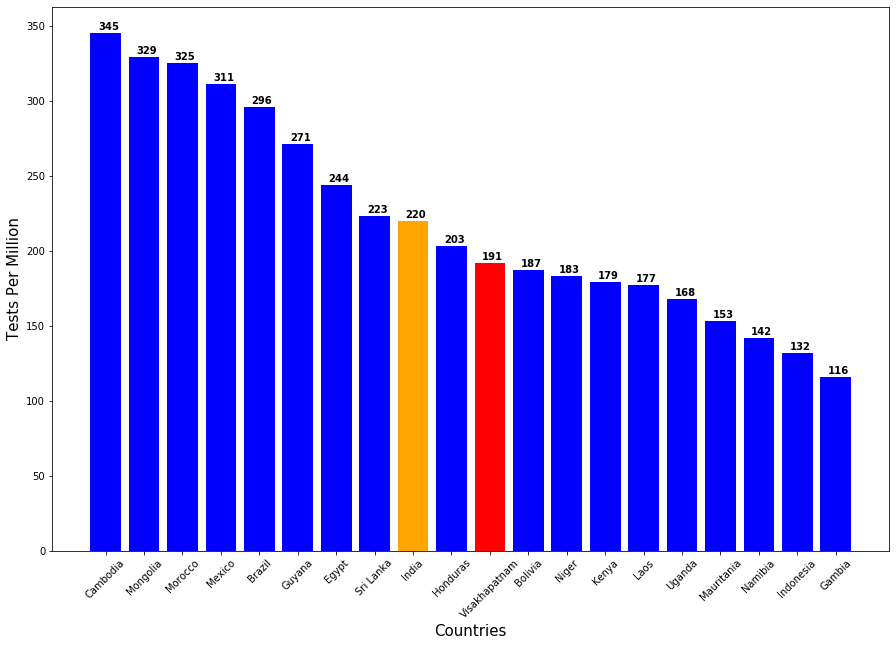

In [562]:
fig, ax = plt.subplots(figsize=(15,10))
x = filtered_world_df["Country,Other"]
y = filtered_world_df["Tests/ 1M pop"]
plt.xticks(rotation=45, fontsize=10)
ax.bar(x, y, color=["blue","blue","blue","blue","blue","blue","blue","blue","orange", "blue", "red","blue"])
for i in range(len(x)):
    ax.text(i-0.2,y[i]+2,int(y[i]), fontweight="bold")
plt.xlabel("Countries", fontsize=15)
plt.ylabel("Tests Per Million", fontsize=15)

In [565]:
world_df.iloc[130:150]

,"Country,Other",Tests/ 1M pop
130,Cambodia,345.000000
131,Mongolia,329.000000
132,Morocco,325.000000
133,Mexico,311.000000
134,Brazil,296.000000
135,Guyana,271.000000
136,Egypt,244.000000
137,Sri Lanka,223.000000
138,India,220.000000
139,Honduras,203.000000
